# breakDown2 plots for regression models
*Author: Dariusz Komosiński*

In [9]:
library(devtools)
devtools::install_github("ModelOriented/DALEX2")
library(DALEX2)
library(breakDown2)

✔  checking for file ‘/tmp/Rtmpj8Glym/remotes1a240088df/ModelOriented-DALEX2-9b43c42/DESCRIPTION’ (1s)
─  preparing ‘DALEX2’:
✔  checking DESCRIPTION meta-information ... 
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘DALEX2/vignettes’
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘DALEX2_0.9.tar.gz’
   


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Welcome to DALEX2 (version: 0.9).


Here we will use the dragons data to present the breakDown2 package for regression models

In [10]:
head(dragons)
new_observation <- dragons_test[1,]
new_observation

year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length
-1291,59.40365,15.32391,7,red,1700,25,1368.4331
1589,46.21374,11.80819,5,red,1700,28,1377.0474
1528,49.17233,13.34482,6,red,1700,38,1603.9632
1645,48.29177,13.27427,5,green,1700,33,1434.4222
-8,49.99679,13.08757,1,red,1700,18,985.4905
915,45.40876,11.48717,2,red,1700,20,969.5682


year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length
-938,39.18619,10.02391,4,black,1800,30,1375.38


## Linear regression

First, we fit a model.

In [15]:
m_lm <- lm(life_length ~ . , data = dragons)

To understand the factors that drive predictions for a single observation we use the `breakDown2` package.

Now we create an object of the `break_down` class. If we want to plot distributions of partial predictions, use argument `keep_distributions`.

In [16]:
bd_lm <- local_attributions(m_lm,
                            data = dragons_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE)

We can simply print the result.

In [18]:
bd_lm

                                contribution
lm: baseline                        1356.562
lm: * scars = 4                     -235.221
lm: * number_of_lost_teeth = 30      205.037
lm: * year_of_birth = -940            22.193
lm: * height = 39                     11.296
lm: * colour = black                  10.856
lm: * weight = 10                     -9.217
lm: * year_of_discovery = 1800         4.668
lm: * life_length = 1400               0.000
lm: prediction                      1366.174
baseline:  0 

Or plot the result which is more clear.

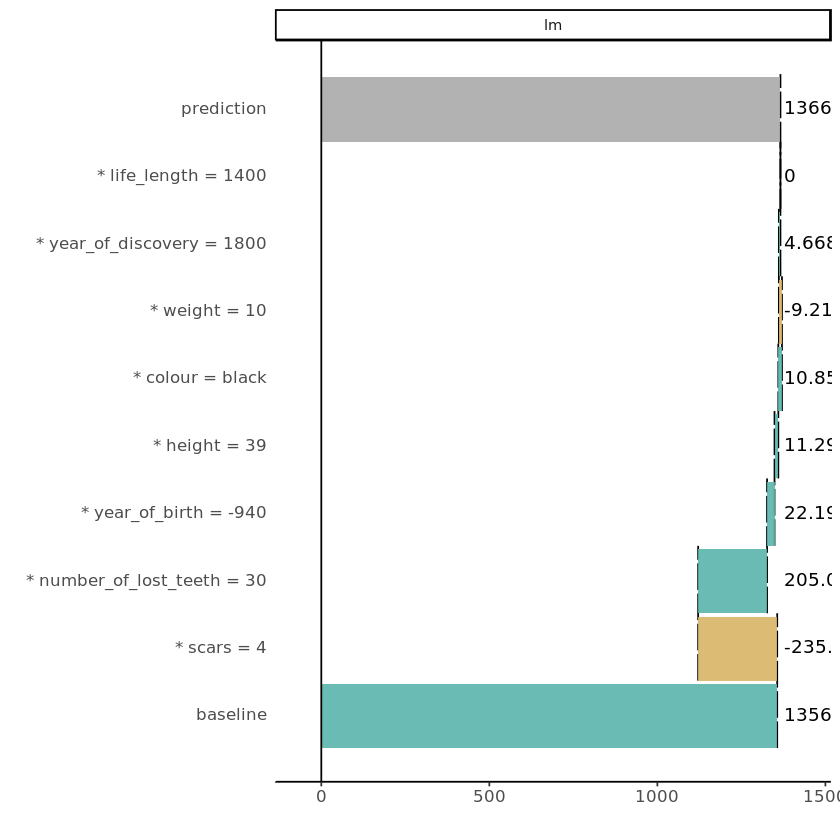

In [19]:
plot(bd_lm)

Use the `start_baseline` argument to set the origin of plots.

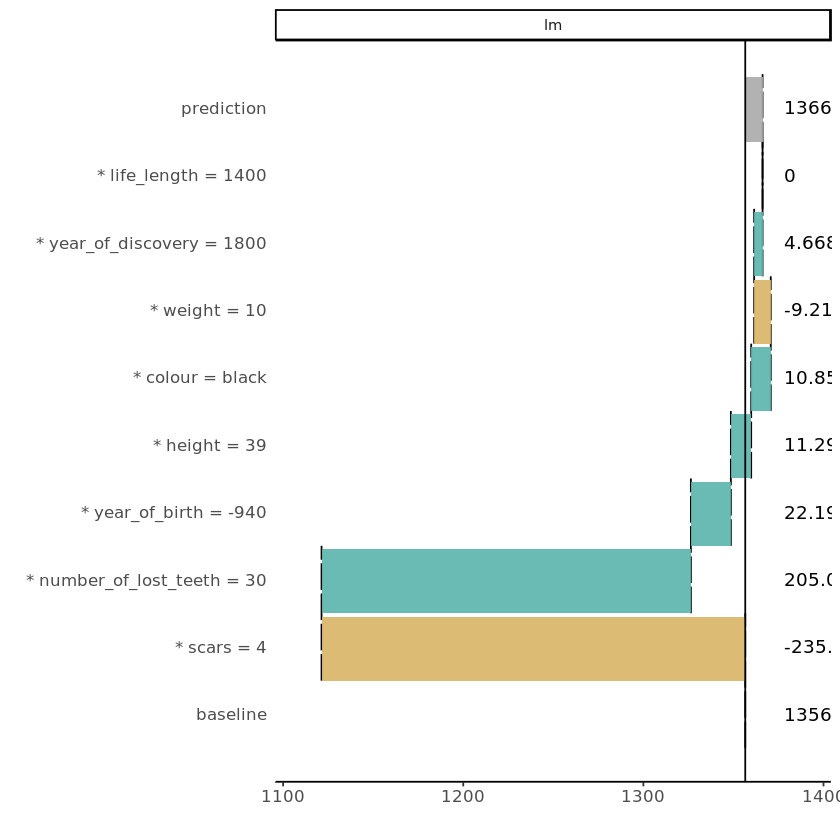

In [20]:
plot(bd_lm, start_baseline = TRUE)

Use the `plot_distributions` argument to see distributions of partial predictions.

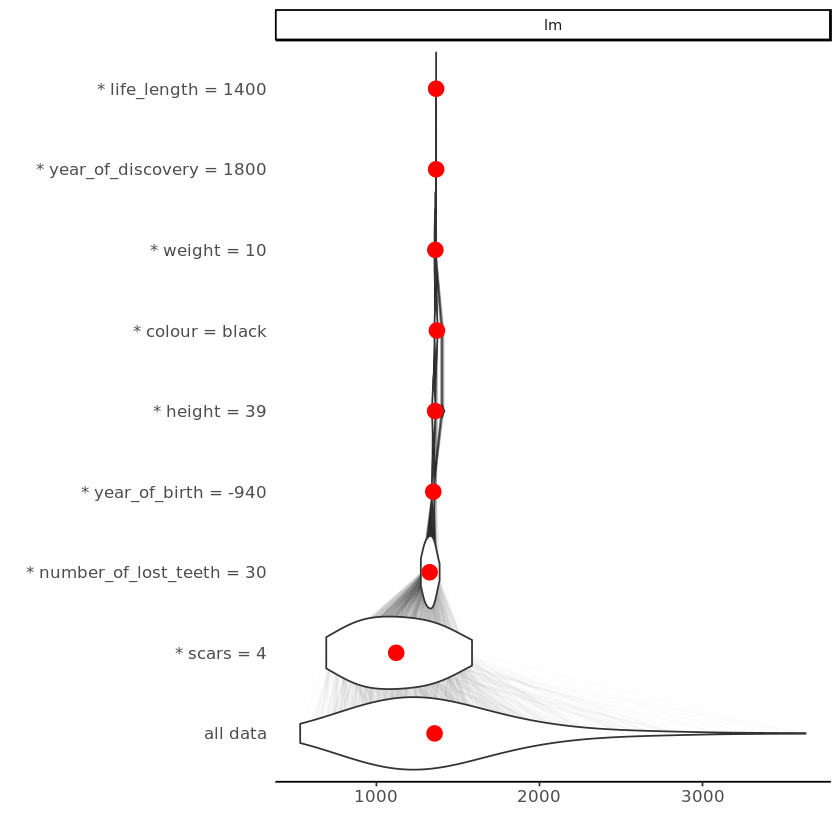

In [21]:
plot(bd_lm, plot_distributions = TRUE)

For another type of models we proceed analogously. However sometimes we need to create our own predict function (see `nnet` example).

## randomForest

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


                                contribution
lm: baseline                        1356.562
lm: * scars = 4                     -235.221
lm: * number_of_lost_teeth = 30      205.037
lm: * year_of_birth = -940            22.193
lm: * height = 39                     11.296
lm: * colour = black                  10.856
lm: * weight = 10                     -9.217
lm: * year_of_discovery = 1800         4.668
lm: * life_length = 1400               0.000
lm: prediction                      1366.174
baseline:  0 

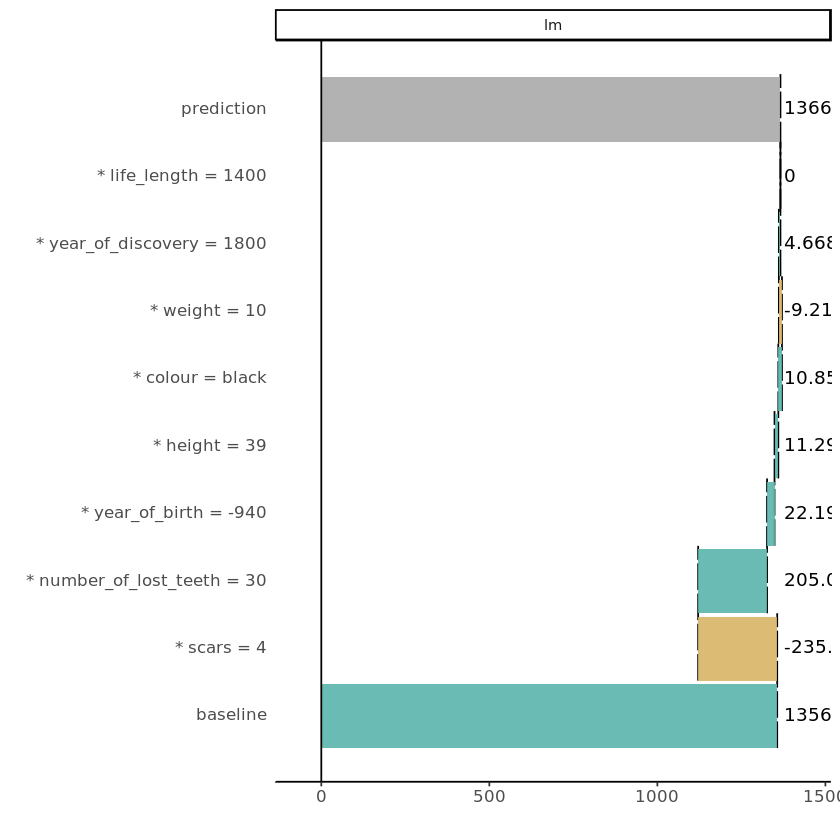

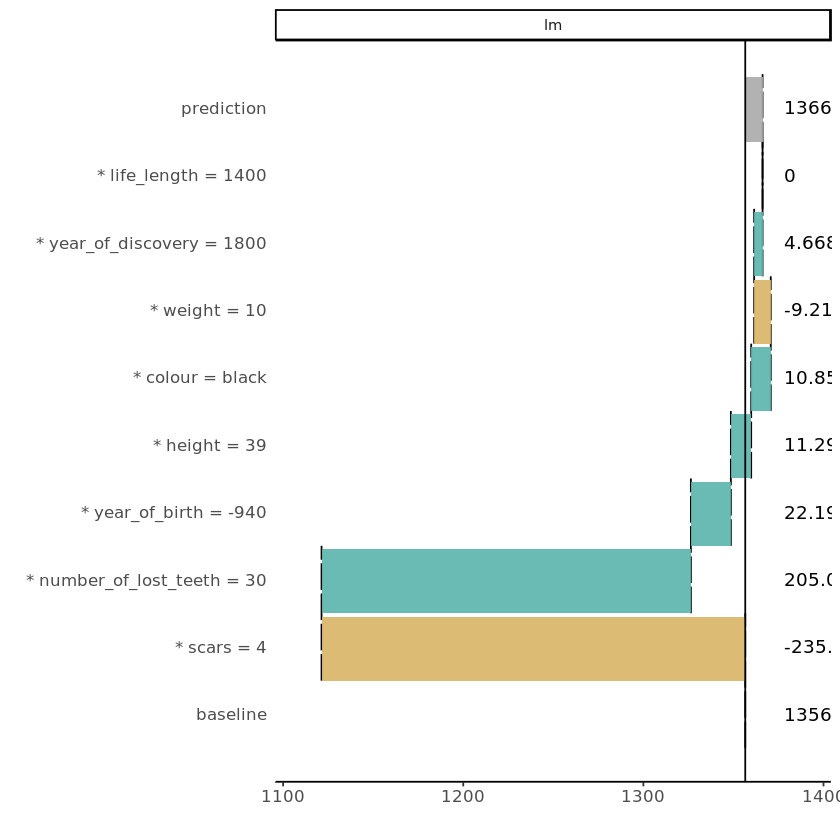

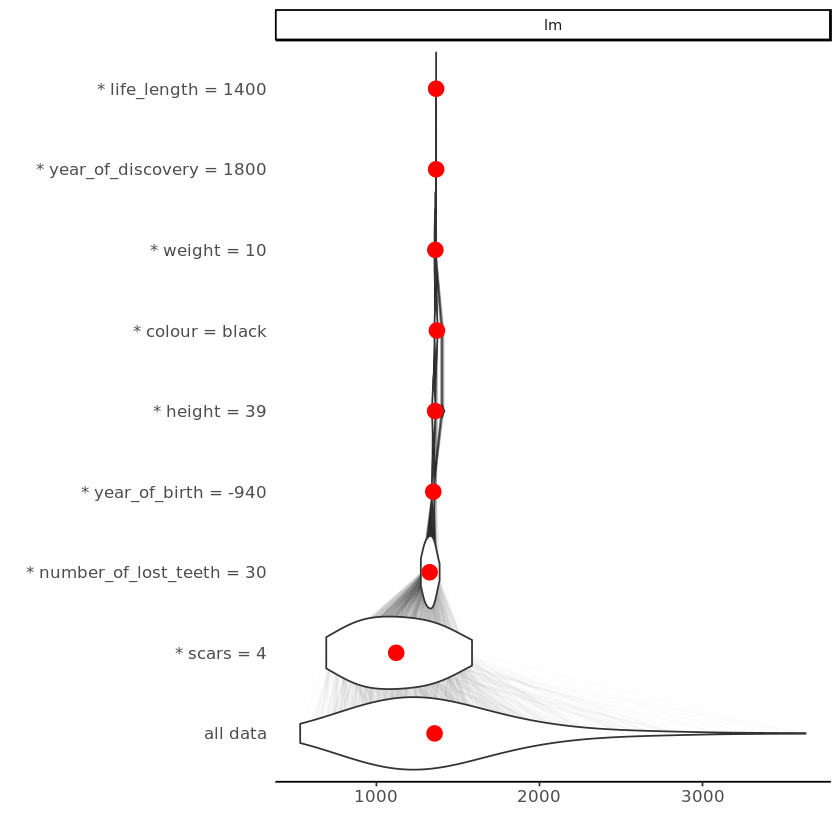

In [22]:
library(randomForest)
m_rf <- lm(life_length ~ . , data = dragons)
bd_rf <- local_attributions(m_rf,
                            data = dragons_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE)
bd_rf
plot(bd_rf)
plot(bd_rf, start_baseline = TRUE)
plot(bd_rf, plot_distributions = TRUE)

## SVM

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


                                         contribution
svm.formula: baseline                        1596.513
svm.formula: * year_of_discovery = 1800      -171.056
svm.formula: * scars = 4                     -192.802
svm.formula: * number_of_lost_teeth = 30      172.537
svm.formula: * weight = 10                     34.149
svm.formula: * height = 39                    -81.207
svm.formula: * year_of_birth = -940            25.134
svm.formula: * colour = black                   9.808
svm.formula: * life_length = 1400               0.000
svm.formula: prediction                      1393.076
baseline:  0 

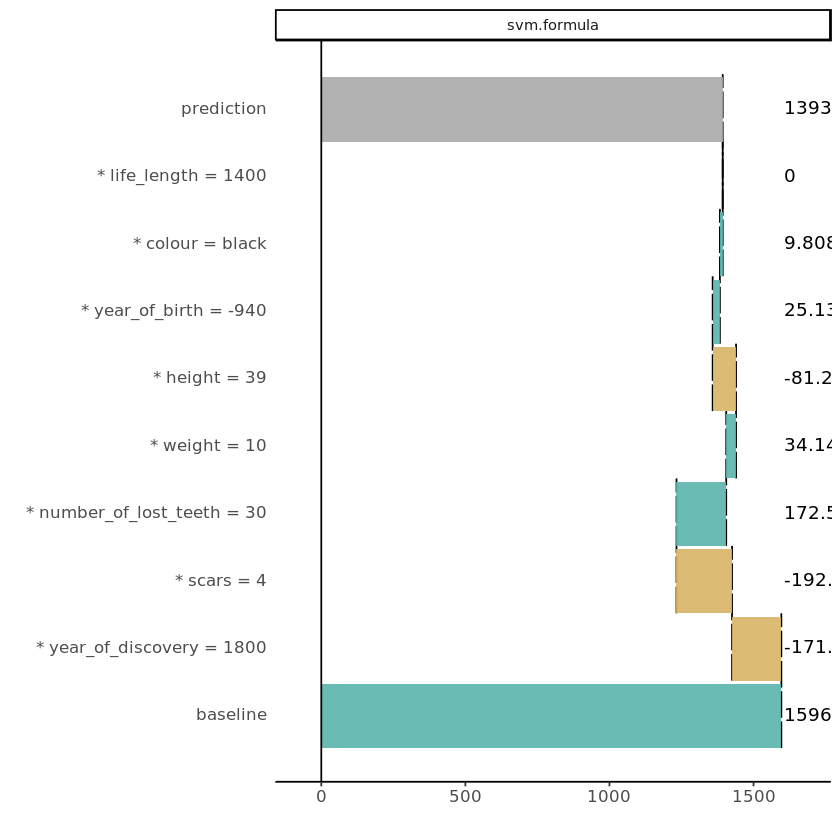

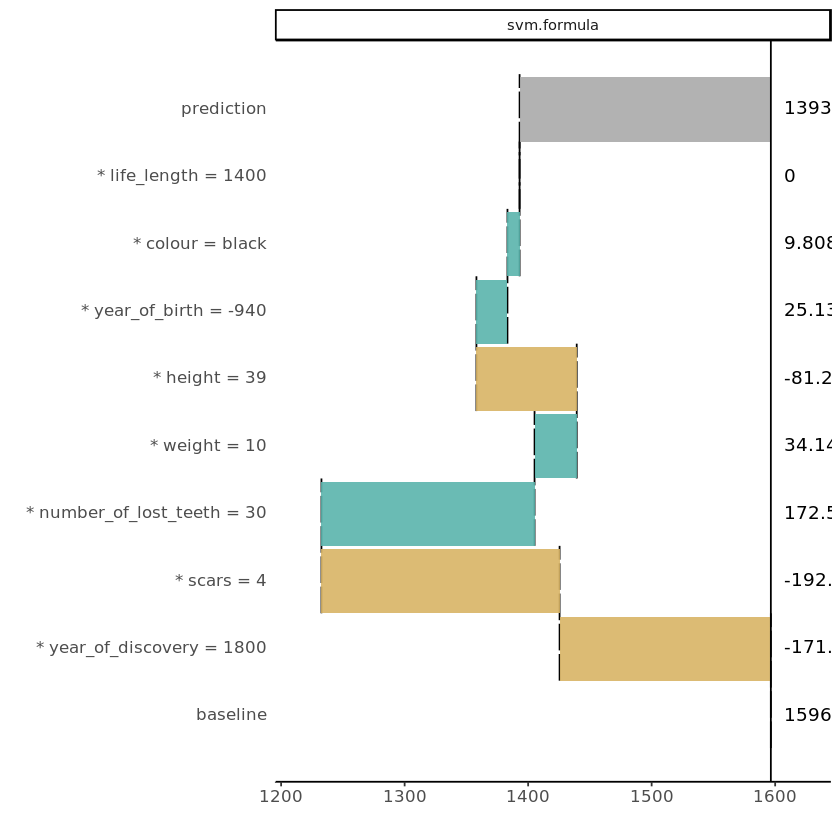

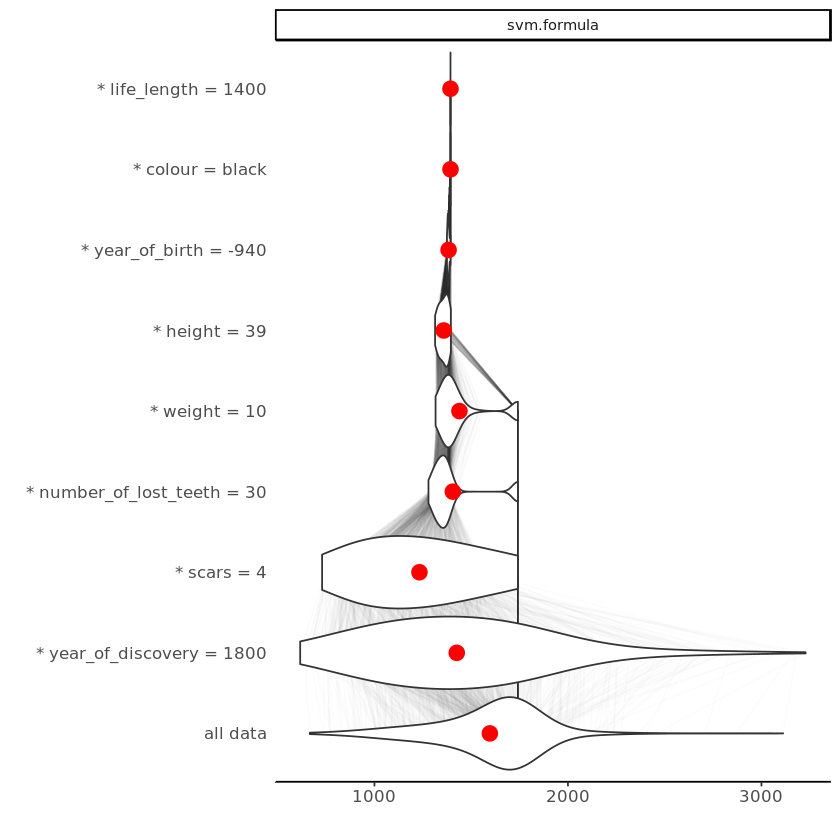

In [30]:
install.packages("e1071")
library(e1071)
m_svm <- svm(life_length ~ . , data = dragons)
bd_svm <- local_attributions(m_svm,
                            data = dragons_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE)
bd_svm
plot(bd_svm)
plot(bd_svm, start_baseline = TRUE)
plot(bd_svm, plot_distributions = TRUE)

## knn

In [ ]:
install.packages("caret")
library(caret)
m_knn <- knnreg(life_length ~ . , data = dragons)
bd_knn <- local_attributions(m_knn,
                            data = dragons_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE)
bd_knn
plot(bd_knn)
plot(bd_knn, start_baseline = TRUE)
plot(bd_knn, plot_distributions = TRUE)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘bindr’, ‘lava’, ‘bindrcpp’, ‘pkgconfig’, ‘plogr’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘dplyr’, ‘generics’, ‘gower’, ‘ipred’, ‘lubridate’, ‘purrr’, ‘RcppRoll’, ‘tidyr’, ‘tidyselect’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’



## nnet

When you use `nnet` package for regression, remember to normalize the resposne variable, in such a way that it is from interval $(0,1)$.

In this case creating own predict function is also needed.

# weights:  111
initial  value 1600.919444 
iter  10 value 32.143522
iter  20 value 27.724731
iter  30 value 27.348830
iter  40 value 26.017730
iter  50 value 25.463338
iter  60 value 14.391427
iter  70 value 9.231410
iter  80 value 6.149977
iter  90 value 3.369140
iter 100 value 2.233904
final  value 2.233904 
stopped after 100 iterations


                                          contribution
nnet.formula: baseline                        1165.565
nnet.formula: * scars = 4                     -193.363
nnet.formula: * year_of_birth = -940           151.441
nnet.formula: * number_of_lost_teeth = 30       93.953
nnet.formula: * height = 39                     37.182
nnet.formula: * colour = black                 -67.198
nnet.formula: * year_of_discovery = 1800        56.625
nnet.formula: * weight = 10                    -18.831
nnet.formula: * life_length = 1400               0.000
nnet.formula: prediction                      1225.374
baseline:  0 

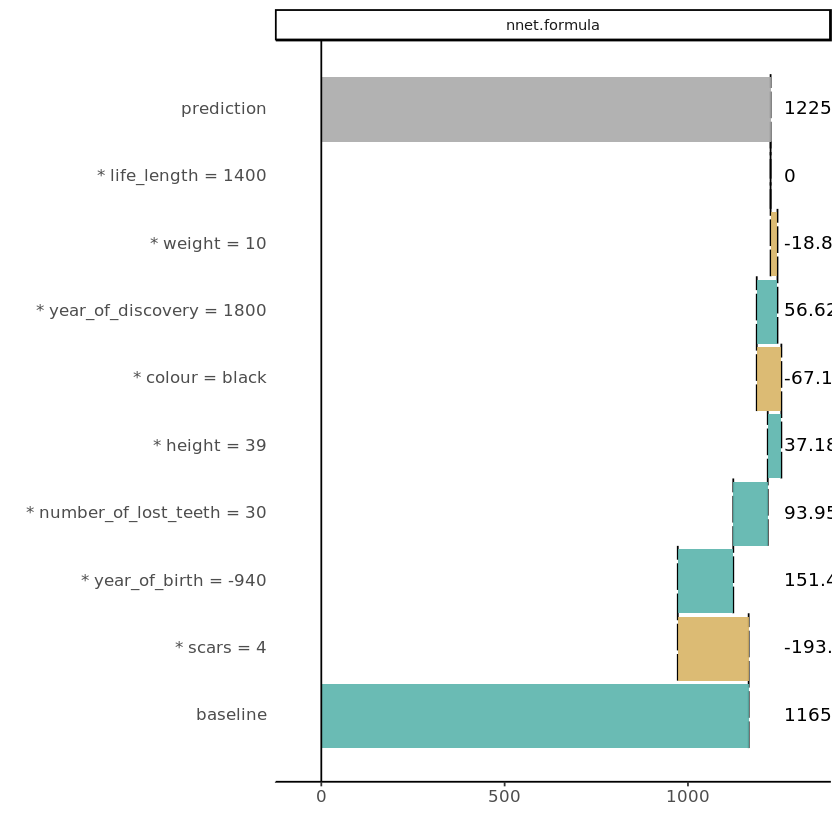

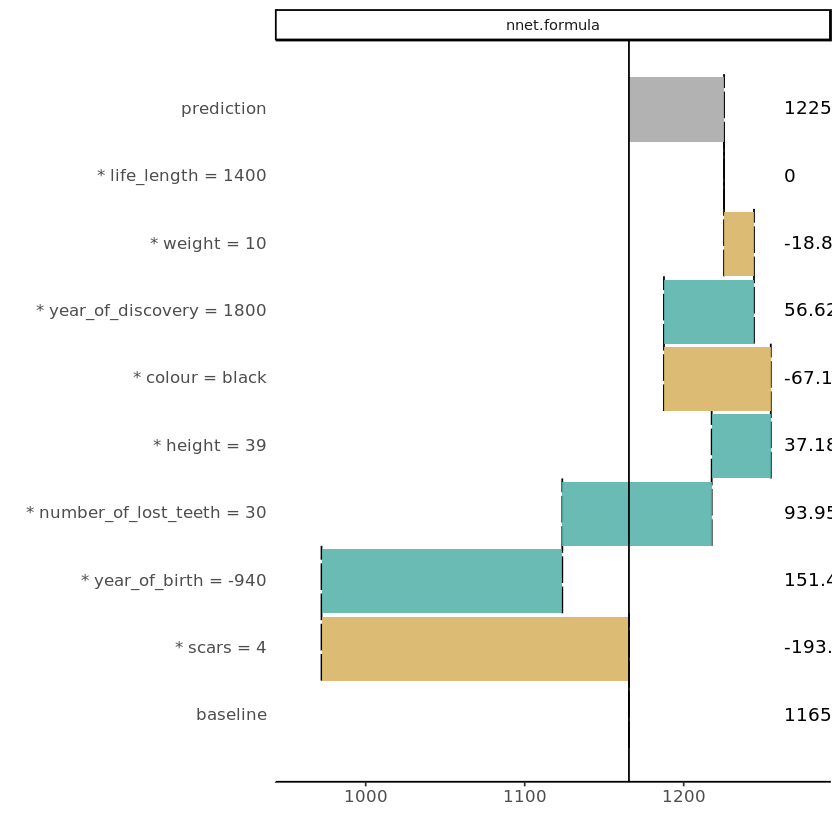

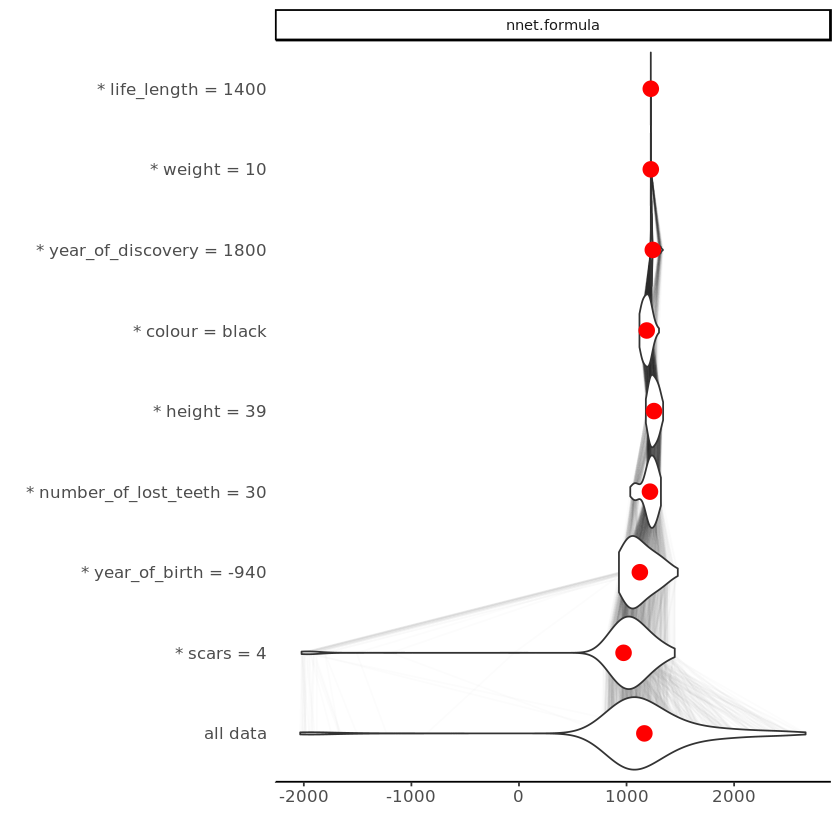

In [28]:
library(nnet)
x <- max(abs(dragons$life_length))
digits <- floor(log10(x))
normalizing_factor <- round(x, -digits)
m_nnet <- nnet(life_length/normalizing_factor ~ . , data = dragons, size = 10, linout = TRUE)
p_fun <- function(model, new_observation){
  predict(model, newdata = new_observation)*normalizing_factor
}
bd_nnet <- local_attributions(m_nnet,
                            data = dragons_test,
                            new_observation =  new_observation,
                            keep_distributions = TRUE,
                            predict_function = p_fun)
bd_nnet
plot(bd_nnet)
plot(bd_nnet, start_baseline = TRUE)
plot(bd_nnet, plot_distributions = TRUE)